<a href="https://colab.research.google.com/github/K-julius/dl_project/blob/main/YOLO_v8_noise_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T4 GPU

In [ ]:
!pip install ultralytics

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/166.8 GB disk)


In [11]:
from ultralytics import YOLO
from IPython.display import display, Image

In [12]:
model_noise_r = YOLO("yolov8n-cls.pt")

print(type(model_noise_r.names), len(model_noise_r.names))
print(model_noise_r.names)

<class 'dict'> 1000
{0: 'n01440764', 1: 'n01443537', 2: 'n01484850', 3: 'n01491361', 4: 'n01494475', 5: 'n01496331', 6: 'n01498041', 7: 'n01514668', 8: 'n01514859', 9: 'n01518878', 10: 'n01530575', 11: 'n01531178', 12: 'n01532829', 13: 'n01534433', 14: 'n01537544', 15: 'n01558993', 16: 'n01560419', 17: 'n01580077', 18: 'n01582220', 19: 'n01592084', 20: 'n01601694', 21: 'n01608432', 22: 'n01614925', 23: 'n01616318', 24: 'n01622779', 25: 'n01629819', 26: 'n01630670', 27: 'n01631663', 28: 'n01632458', 29: 'n01632777', 30: 'n01641577', 31: 'n01644373', 32: 'n01644900', 33: 'n01664065', 34: 'n01665541', 35: 'n01667114', 36: 'n01667778', 37: 'n01669191', 38: 'n01675722', 39: 'n01677366', 40: 'n01682714', 41: 'n01685808', 42: 'n01687978', 43: 'n01688243', 44: 'n01689811', 45: 'n01692333', 46: 'n01693334', 47: 'n01694178', 48: 'n01695060', 49: 'n01697457', 50: 'n01698640', 51: 'n01704323', 52: 'n01728572', 53: 'n01728920', 54: 'n01729322', 55: 'n01729977', 56: 'n01734418', 57: 'n01735189', 58:

Data Path

In [13]:
dataset_path = "/content/drive/MyDrive/DL_project/archive_CGrestored2" #noise O -> noise removal

#define the training and testing directories
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

#define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

Load and Check the dataset

notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: Category, dtype: int64


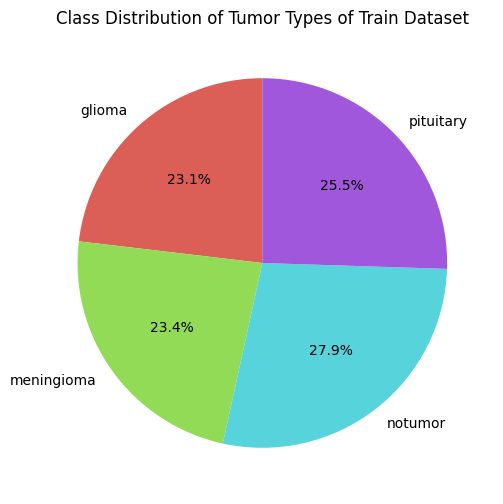

In [14]:
train_data = []

for category in categories:
    path = os.path.join(train_dir, category)
    images = os.listdir(path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    train_df = pd.concat(train_data, axis=0)

# Visualize the distribution of tumor types in the training dataset
# ratio = train_df["Count"].unique()
print(train_df['Category'].value_counts())
ratio = [1321, 1339, 1595, 1457] #glioma, meningioma, notumor, pituitary
total = sum(ratio)
percent = [(i/total) * 100 for i in ratio]
colors = sns.color_palette('hls',len(ratio))
plt.figure(figsize=(8, 6))
plt.pie(percent, colors=colors, labels = categories, autopct = '%1.1f%%', startangle = 90)
plt.title("Class Distribution of Tumor Types of Train Dataset")
plt.show()

notumor       405
meningioma    306
glioma        300
pituitary     300
Name: Category, dtype: int64


Text(0.5, 1.0, 'Class Distribution of Tumor Types of Test Dataset')

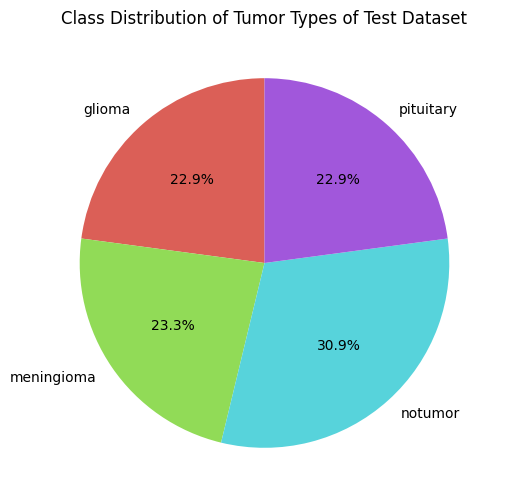

In [15]:
test_data = []

for category in categories:
    path = os.path.join(test_dir, category)
    images = os.listdir(path)
    count = len(images)
    test_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    test_df = pd.concat(test_data, axis=0)

# Visualize the distribution of tumor types in the training dataset

print(test_df['Category'].value_counts())
ratio = [300, 306, 405, 300] #glioma, meningioma, notumor, pituitary
total = sum(ratio)
percent = [(i/total) * 100 for i in ratio]
colors = sns.color_palette('hls',len(ratio))
plt.figure(figsize=(8, 6))
plt.pie(percent, colors=colors, labels = categories, autopct = '%1.1f%%', startangle = 90)
plt.title("Class Distribution of Tumor Types of Test Dataset")

set up the image size, batch size, epoch

In [16]:
#image_size = (160, 160)
batch_size = 32
epochs = 50

In [17]:
results = model_noise_r.train(data = dataset_path, epochs = epochs, imgsz=160)

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/DL_project/archive_CGrestored2, epochs=50, patience=50, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DL_project/archive_CGrestored2/train... 5712 images, 0 corrupt: 100%|██████████| 5712/5712 [14:59<00:00,  6.35it/s]


train: New cache created: /content/drive/MyDrive/DL_project/archive_CGrestored2/train.cache
albumentations: RandomResizedCrop(p=1.0, height=160, width=160, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/drive/MyDrive/DL_project/archive_CGrestored2/test... 1311 images, 0 corrupt: 100%|██████████| 1311/1311 [03:24<00:00,  6.41it/s]


val: New cache created: /content/drive/MyDrive/DL_project/archive_CGrestored2/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.405G      1.587         16        160:   1%|▏         | 5/357 [00:01<01:23,  4.23it/s]

       1/50     0.405G      1.535         16        160:   2%|▏         | 8/357 [00:03<02:17,  2.54it/s]
100%|██████████| 755k/755k [00:00<00:00, 12.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.47it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all      0.908          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.42it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.38it/s]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.34it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.43it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.42it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.388G    0.08031         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.37it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.388G    0.08429         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.42it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.388G    0.07242         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.47it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.388G    0.05865         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.43it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.388G    0.06082         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.47it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.388G    0.04684         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.46it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.388G     0.0451         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.388G    0.04171         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.49it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.388G    0.03738         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.388G    0.04072         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.38it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.388G    0.02828         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:18<00:00,  2.19it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.388G    0.03321         16        160: 100%|██████████| 357/357 [01:32<00:00,  3.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.47it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.388G    0.02883         16        160: 100%|██████████| 357/357 [01:31<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:18<00:00,  2.20it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.388G    0.03304         16        160: 100%|██████████| 357/357 [01:32<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.29it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.388G    0.01893         16        160: 100%|██████████| 357/357 [01:31<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:18<00:00,  2.27it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.388G    0.01877         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.41it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.388G    0.02593         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.41it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.388G    0.01524         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.41it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.388G    0.02112         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.388G    0.01804         16        160: 100%|██████████| 357/357 [01:29<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.388G     0.0163         16        160: 100%|██████████| 357/357 [01:29<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.37it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.388G    0.01698         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.388G    0.01363         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.388G    0.01818         16        160: 100%|██████████| 357/357 [01:33<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.388G    0.01012         16        160: 100%|██████████| 357/357 [01:31<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.35it/s]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.388G    0.01634         16        160: 100%|██████████| 357/357 [01:29<00:00,  3.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.388G   0.009828         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.388G   0.008819         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.38it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.388G    0.01076         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.388G    0.01086         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.46it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.388G    0.01237         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.40it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.388G   0.008765         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.388G   0.006971         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.41it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.388G   0.006372         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.37it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.388G   0.007196         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.48it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.388G   0.005918         16        160: 100%|██████████| 357/357 [01:30<00:00,  3.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.388G   0.005586         16        160: 100%|██████████| 357/357 [01:26<00:00,  4.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.42it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.388G   0.009794         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.39it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.388G   0.006092         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.45it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.388G   0.005381         16        160: 100%|██████████| 357/357 [01:28<00:00,  4.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:16<00:00,  2.46it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.388G   0.005338         16        160: 100%|██████████| 357/357 [01:27<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.41it/s]

                   all      0.984          1



50 epochs completed in 1.480 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/drive/MyDrive/DL_project/archive_CGrestored2/train... found 5712 images in 4 classes ✅ 
val: None...
test: /content/drive/MyDrive/DL_project/archive_CGrestored2/test... found 1311 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:17<00:00,  2.38it/s]


                   all      0.985          1
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [18]:
print(results)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a84d21dd900>
curves: []
curves_results: []
fitness: 0.9923722445964813
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9847444891929626, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9923722445964813}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.045168772623977255, 'inference': 0.3052459792450673, 'loss': 0.0006292359143336432, 'postprocess': 0.0005210291602791583}
task: 'classify'
top1: 0.9847444891929626
top5: 1.0


In [19]:
results.confusion_matrix

In [20]:
#!pip install -U albumentations